# Cross-validation exercise 

This is a little exercise to look at some basic ML and statistics concepts while dealing with the data that we collected ourselves! I think the best way to understand these concepts is by dealing with actual data, so here goes. 

## The problem
We've collected our data from Mechanical Turk and now we want to analyze it. The first step with this should always be plotting the data. Luckily, the plotting code was pretty much done, and we don't have much left to do. For the sake of time/not being redundant, I'll just point to the existing plotting code, which is in `plot_turk_results.ipynb`. The result of plotting this data looks like this: 

![data plotted](scores_version_1.pdf)

What we see is that the data is distributed in a sort of s-shaped curve, which shows that our hypothesis about vague predicates is confirmed by the data: human annotators don't agree about vague predicates, and there are examples in the middle which are hard for them to classify. But here's the problem: we only have 4 pages of content for our paper to convince our reader that this trend holds across all our predicates. Of course, we could include a plot for each predicate, but we have 7 predicates across 2 datasets, so that's 14 plots, which is a lot of space. It's probably better to just show a couple illustrative plots, and then have some kind of quantitative measure that tells us the other plots also fall into this pattern. 

So how do quantify the "s-ness" of the data for each predicate? 


## Curve fitting 
We can rephrase this problem into the langauge of statistics to quantify our "s-ness". Let's back off to a simpler case. Consider the following data:


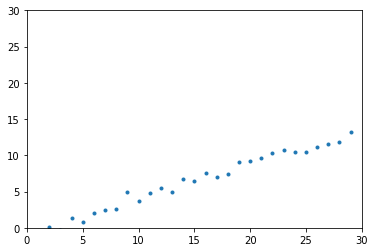

In [22]:
from matplotlib import pyplot as plt 
import numpy as np
np.random.seed(12)

xs = np.arange(0, 30, 1)
ys = 1/2 * (xs + np.random.normal(0, 1, len(xs))) - 1 

plt.ylim(0,30)
plt.xlim(0,30)

plt.plot(xs, ys, ".")


Clearly, the data follows a linear trend, with some noise that causes it to jiggle off of the line of best fit. If you look at the code, that's exactly how I generated the data. So you could say that we have a *hypothesis class* of functions that we think generated this data (a linear equation with some Gaussian noise) and what we need to do to test that hypothesis is find the best fit in our hypothesis class, and apply it to the data. 

The way we fit the line is by adjusting the parameters until it best fits our data. Sometimes we can do that in closed form: for a line with equation $y = mx + b$, given $x$ and $y$ we can solve for the parameters $m$ and $b$ to get their optimal values in one step. For more complicated functions, we'll approximate that process with iterative methods like gradient descent. 

**Exercise** Eyeball what you think is the best-fit line and plot it. Then get an estimate by using [scipy.linregress](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html) and plot it as well



In [24]:
## Exercise 1 here 


In real life, we don't get to know how the data was generated, but we can still have a hypothesis class of functions that we think approximate our data. That's why plotting it is an important first step. We can then test our hypothesis by fitting our function to the data as best we can, and measuring the error of that best fit. So, for example, with the line data, we could fit a line, a polynomial function, a sinusoidal function, a normal distribution, etc. etc. and then compare them. Broadly, if one does better than another, we can say it better accounts for the data. 

So for our S-shaped data, we're looking for a function that's S-shaped: for example, the sigmoid function

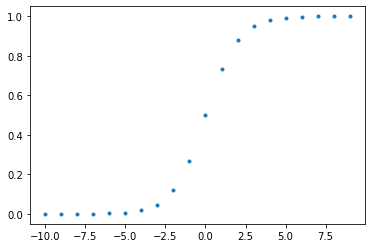

In [11]:
def sigmoid(x, x0, k):
    return 1.0 / (1.0 + np.exp(-k * (x-x0)))


xs = np.arange(-10, 10, 1)
ys = [sigmoid(x, 0, 1) for x in xs] 
plt.plot(xs, ys, ".")


Here, we have parameters `x0` which controls the shift (left and right) and `k` which controls the vertical dimension. **Exercise** Try playing with different values on these to see what varying them does. 

In [25]:
## Exercise 2: play with sigmoid here: 

Like with lines, we can fit a sigmoid curve to our data. It's a worthwhile exercise to figure out how to do this from scratch, but it requires a bit more linear algebra. For background info, you can read up on [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression). 
We'll let someone else handle the curve fitting, namely `scipy`, which has almost all of the stats and most ML things you can think of bundled together in a nice, well-implemented package. Combined with `numpy`, knowing `scipy` is well probably sufficient to do 90% of all data science work. Here's a wrapper function for fitting sigmoid curves from our data: 


In [13]:
def fit_sigmoid(data):
    xs = np.arange(len(data.keys()))
    ys = [np.mean([line['p_true']  for line in data[key] ] ) for key in data.keys() ]
    ys = np.array(ys)/100
    popt, pcov = curve_fit(sigmoid, xs, ys, p0= [20, 0.1], method='dogbox')
    pred_ys = np.array([sigmoid(x, popt[0], popt[1]) for x in xs])
    # use mean squared error
    goodness_of_fit = np.sqrt(np.sum((pred_ys - ys)**2) / len(pred_ys))
    return goodness_of_fit, popt

I'll break this down line by line:

```xs = np.arange(len(data.keys()))``` defines the points along the x axis, in this case just 0, 1, 2, ...

```ys = [np.mean([line['p_true']  for line in data[key] ] ) for key in data.keys() ]``` sets the y values to the average slide-bar value assigned by each annotator (there are 10 of these). 

```ys = np.array(ys)/100``` **Exercise** do some reading about the sigmoid function so see why this line is necessary 

```popt, pcov = curve_fit(sigmoid, xs, ys, p0= [20, 0.1], method='dogbox')``` calls scipy's function, **exercise** read the docs for `curve_fit` to see what the parameters here are and what the function returns.

```pred_ys = np.array([sigmoid(x, popt[0], popt[1]) for x in xs])``` based on our parameter estimates from scipy, we can get the predicted values for each `x` point. 

``` goodness_of_fit = np.sqrt(np.sum((pred_ys - ys)**2) / len(pred_ys))``` measures the root mean squared error, which tells us how far off the predicted values were from the real values. This is a way to quantify the error of our best fit model. If you want more info on it, you can check [here](https://towardsdatascience.com/what-does-rmse-really-mean-806b65f2e48e) 



### Excercise 3 explanation here: 


## Overfitting
TODO


## Cross-validation
TODO